In [1]:
# Assignment No. 4:- Use Autoencoder to implement anomaly detection

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0324 - val_loss: 0.0196
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0169 - val_loss: 0.0150
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0137 - val_loss: 0.0127
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 10/10
313/313 [==============================] - 1s 1ms/step


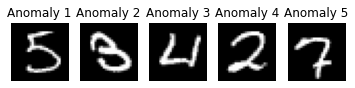

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Split the data into training and testing sets
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

# Define the encoder
input_layer = Input(shape=(x_train.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Latent representation

# Create the encoder model
encoder = Model(input_layer, encoded)

# Define the decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_val, x_val))

# Evaluate the autoencoder on the test data
reconstruction_errors = np.mean(np.square(x_test - autoencoder.predict(x_test)), axis=1)

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(reconstruction_errors, 95)

# Detect anomalies in the test data
anomalies = x_test[reconstruction_errors > threshold]

# Display some of the detected anomalies
n_anomalies_to_display = 5
for i in range(n_anomalies_to_display):
    plt.subplot(1, n_anomalies_to_display, i + 1)
    plt.imshow(anomalies[i].reshape(28, 28), cmap='gray')
    plt.title(f'Anomaly {i + 1}')
    plt.axis('off')

plt.show()